In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

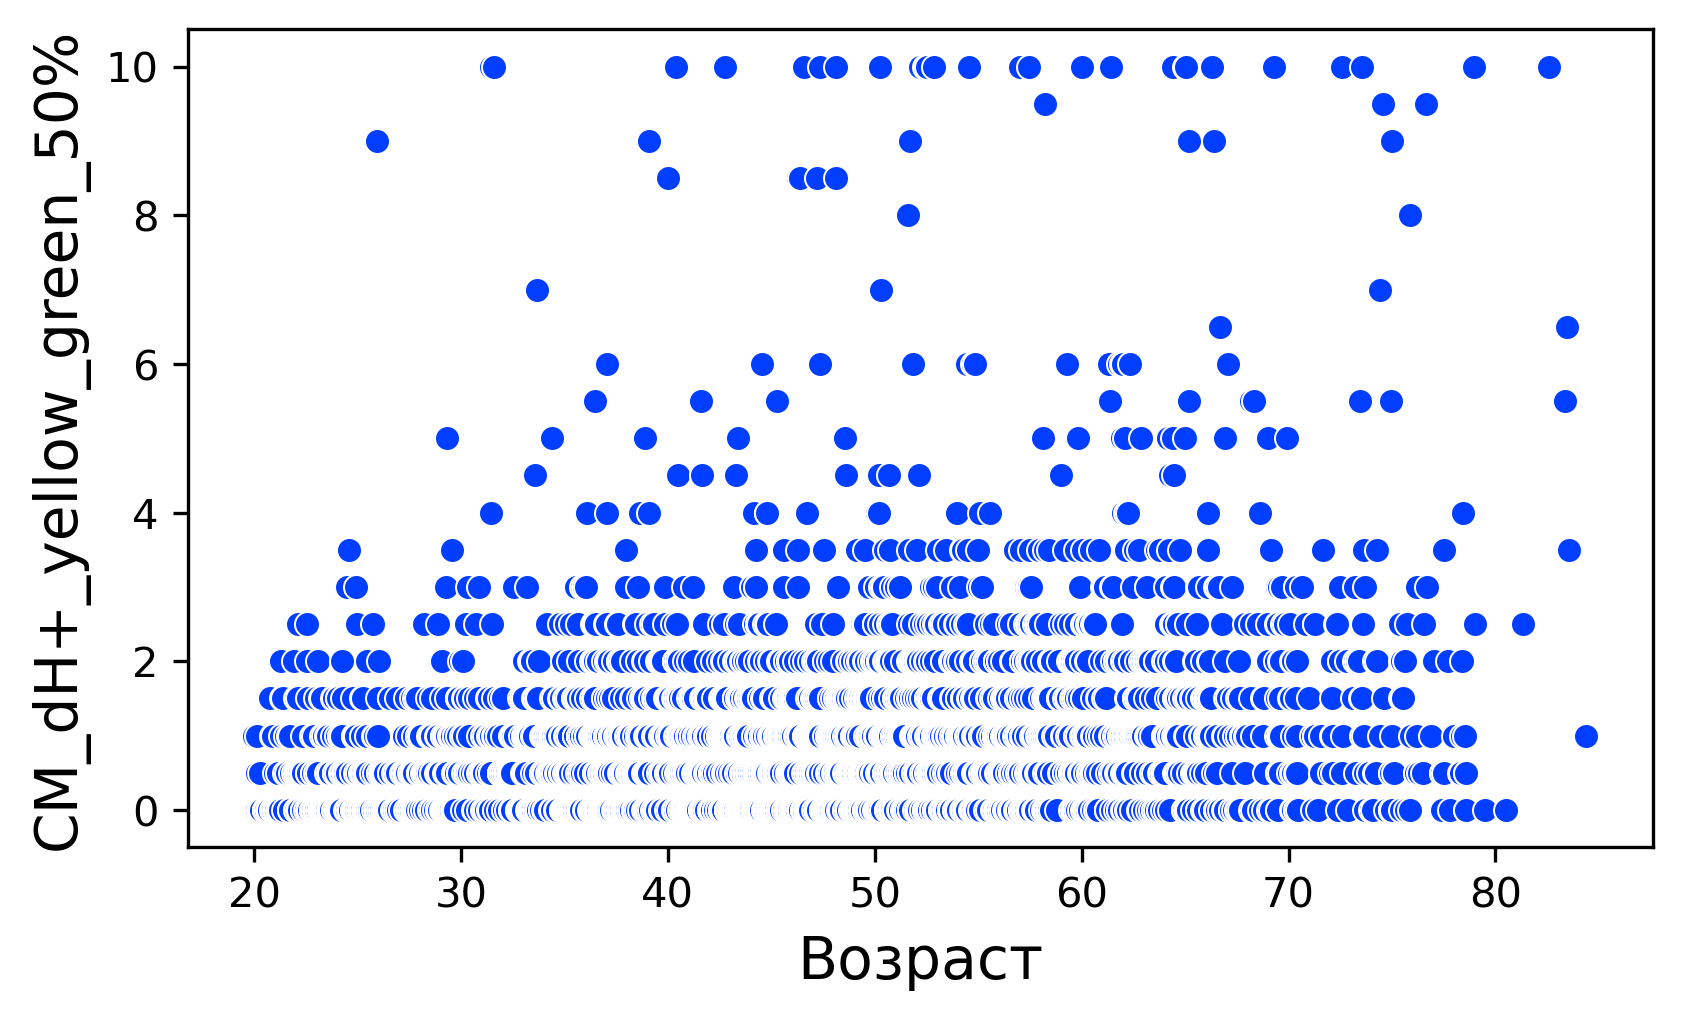

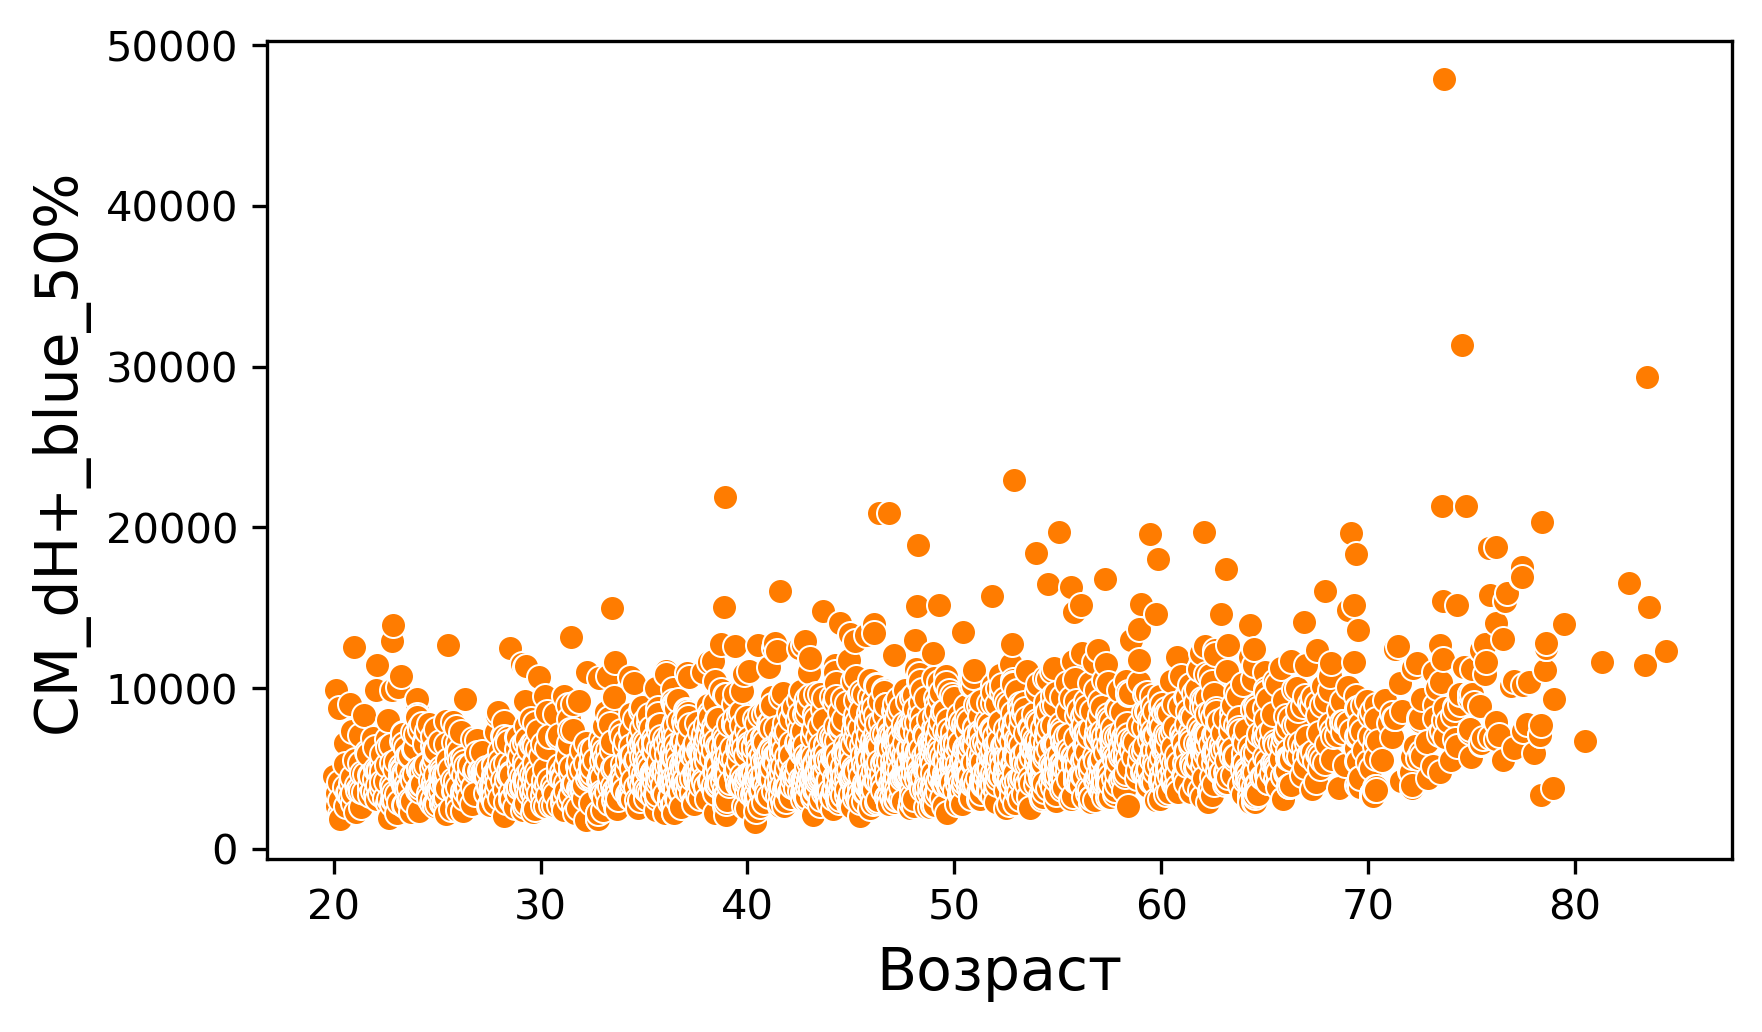

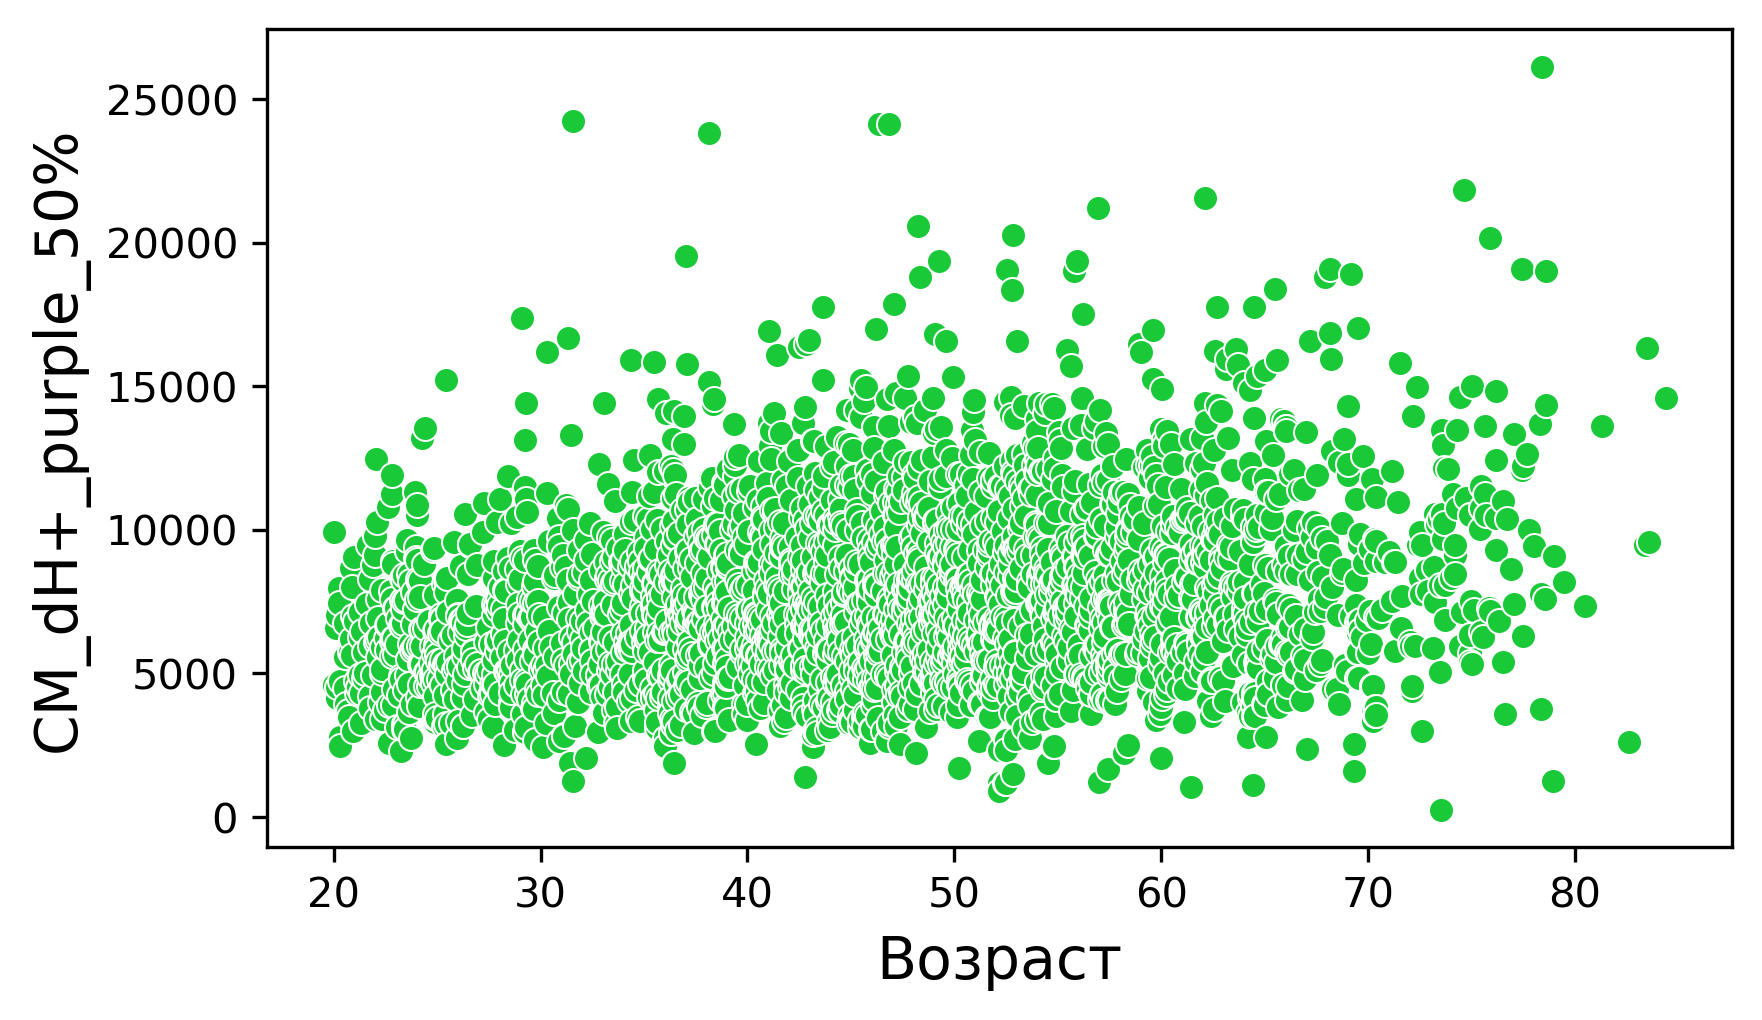

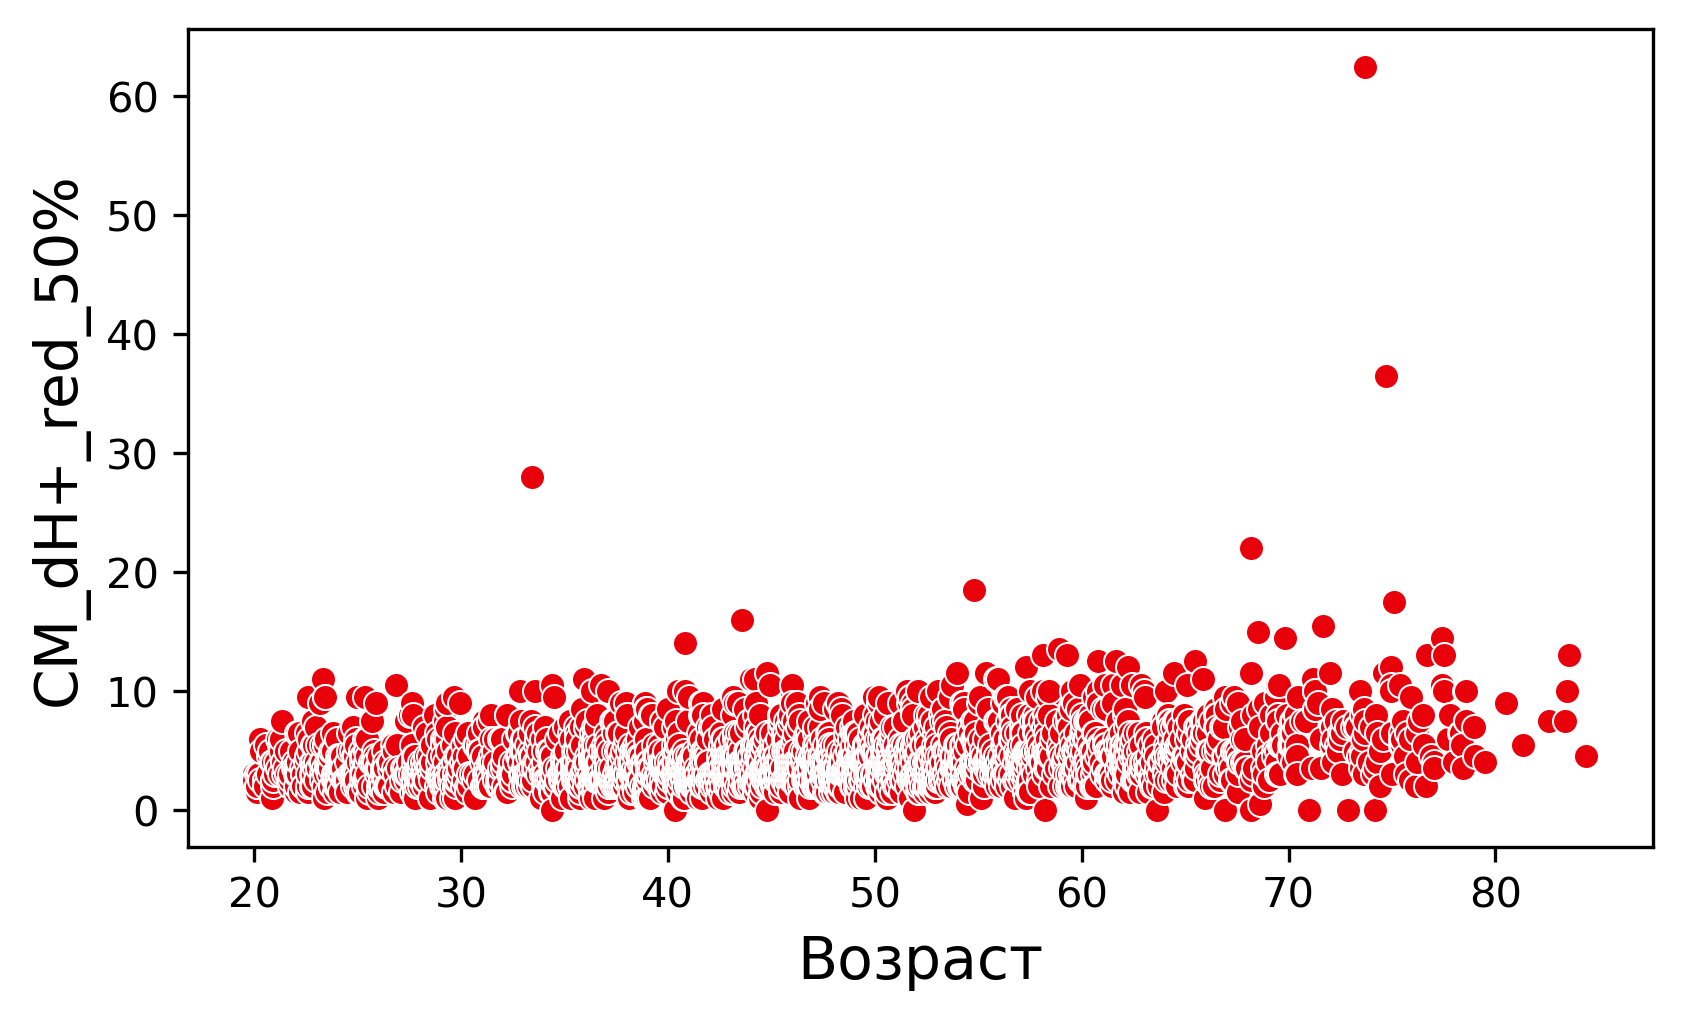

In [15]:
fig_width = 6.3  
fig_height = 3.54  


data = pd.read_excel("summary_per_color_group.xlsx")
test_data = data.rename(columns=lambda x: x.replace('T258', 'CM')) #замена названий столбцов

columns = ["CM_dH+_yellow_green_50%", "CM_dH+_blue_50%", "CM_dH+_purple_50%", "CM_dH+_red_50%"]
color_dict = sns.color_palette("bright", n_colors=4) 

for i,col in enumerate(columns):
    plt.figure(figsize=(fig_width, fig_height), dpi=300)
    sns.scatterplot(data=test_data, x='age', y=col, color=color_dict[i])
    
    plt.xlabel('Возраст', fontsize=14, fontweight='light')
    plt.ylabel(col, fontsize=14, fontweight='light')
